In [49]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler


random_state = 42

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Tracce altro drive/29-01-2020/seeds_dataset.txt',sep='\t',names = ['A0','A1','A2','A3','A4','A5','A6','y'])
display(df)

,A0,A1,A2,A3,A4,A5,A6,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [51]:
X = df.drop(['y'],axis = 1)
y = df['y']

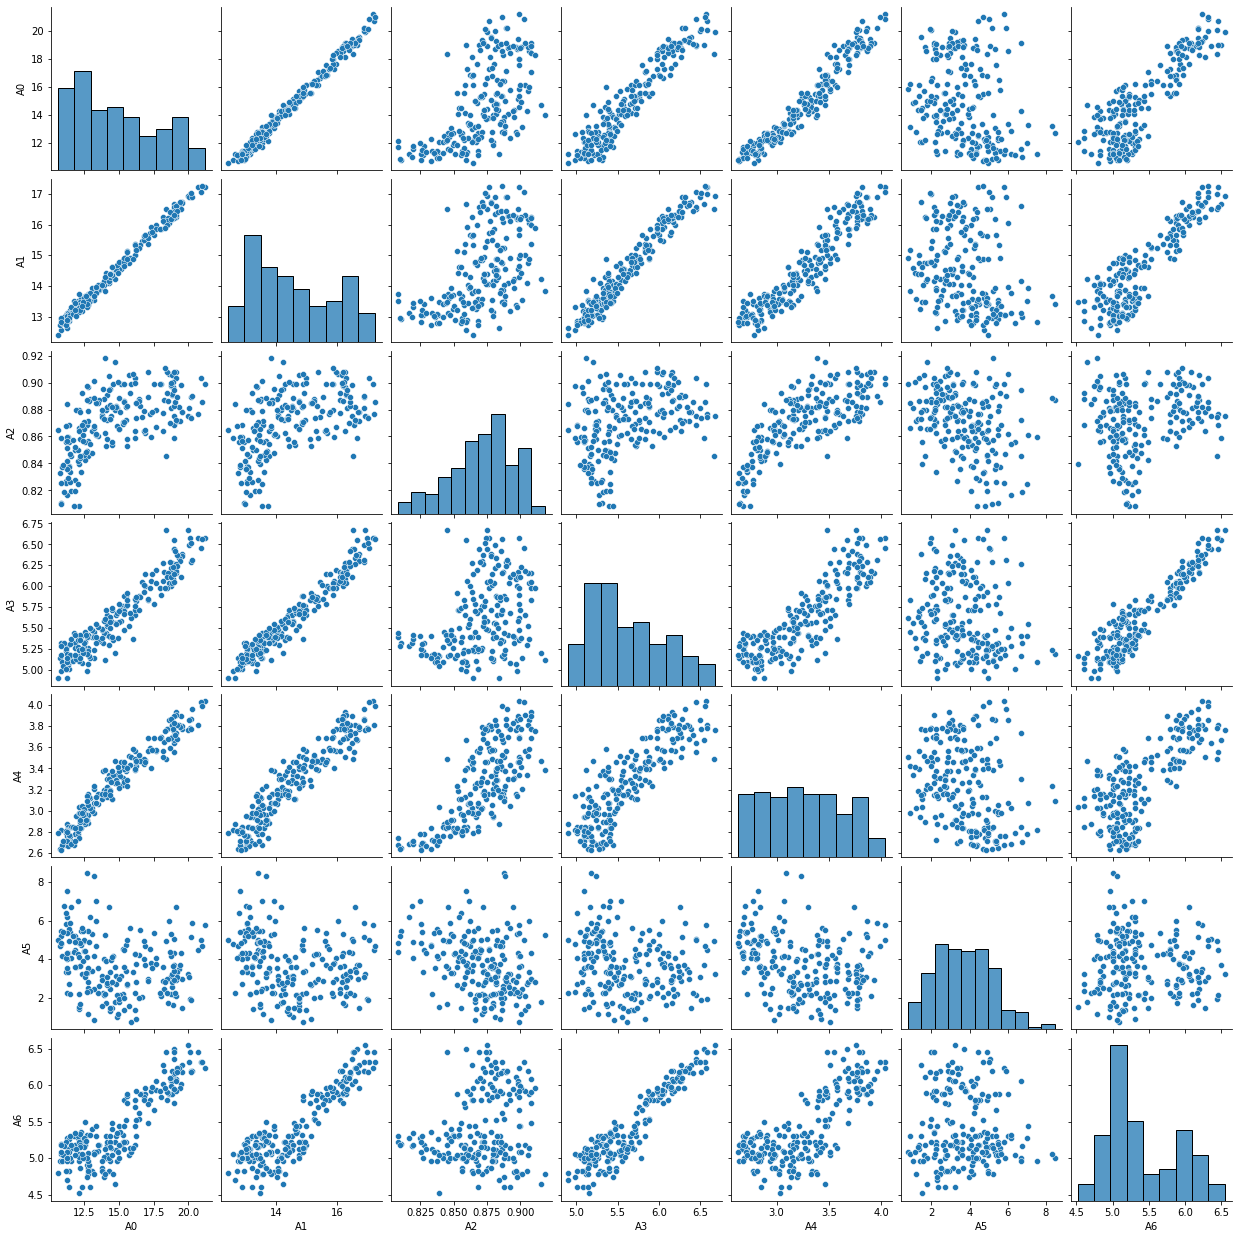

In [52]:
sns.pairplot(X)

Judging by the pairplots, we choose the columns with indexes 3,6, as they seem to create three distinct clusters, one for each of the classes that we have. We will plot a scatterplot using those two columns.

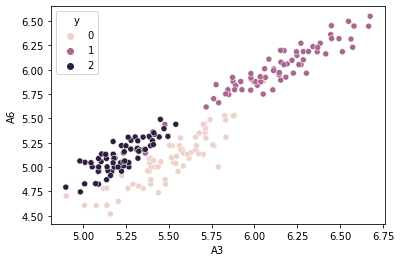

In [53]:
focus = ['A3','A6']
sns.scatterplot(x = focus[0], y = focus[1], data = df, hue = 'y')

In [54]:
def clustering(data,k_range):
  inertias = []
  silhouette = []
  values = []
  for k in k_range:
    model = KMeans(n_clusters=k,random_state=random_state)
    pred_KMeans = model.fit_predict(X)
    inertias.append(model.inertia_)
    silhouette.append(silhouette_score(X,pred_KMeans))
    values.append([k,model.inertia_,silhouette_score(X,pred_KMeans)])
  return values,inertias,silhouette

k_range = list(range(2,11))
values,inertias,silhouette = clustering(X,k_range)
     
results = pd.DataFrame(data = values, columns=['n_cluster','inertia','silhouette'])
results.sort_values(by='silhouette', ascending=False).head(5)

,n_cluster,inertia,silhouette
0,2,1011.712345,0.518287
1,3,587.318612,0.471934
2,4,471.498309,0.412528
4,6,323.270272,0.368666
5,7,279.435673,0.366621


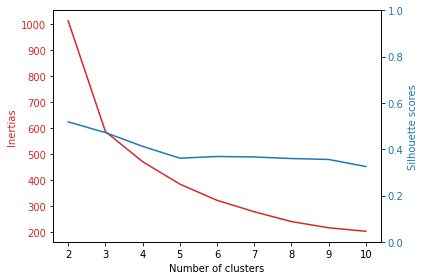

In [55]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [ ]:
two_plots(x=k_range, y1=inertias, y2=silhouette
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

best number of cluster is 3 

In [57]:
model = KMeans(n_clusters=3,random_state=random_state)
y_km = model.fit_predict(X)

In [58]:
def max_diag(sq_arr):
    """
    Given a square matrix produces another squared matrix with the same contents, 
    but the columns are re-orered in order to have the highest values in the main diagonal
    Parameter: sq_arr - a squared matrix
    Example:
    In [1]: import numpy as np
            max_diag(np.array([[1,10],[20,2]]))
    Out[1]: array([[10.,  1.],
                   [ 2., 20.]])
    This function is useful to reorder a confusion matrix when the two label vectors
    have different codings
    """
    import numpy as np
    if len(sq_arr.shape) != 2 or sq_arr.shape[0]!=sq_arr.shape[1]:
        return "Not a squared matrix"
    # find the position of the maximum value in each row
    max_pos = [np.argmax(sq_arr[i,:]) for i in range(sq_arr.shape[0])]
    if len(set(max_pos))!=sq_arr.shape[0]:
        return "There are columns with non unique maximum"
    sq_arr_sh = np.empty(sq_arr.shape)
    for i in range(sq_arr.shape[0]):
        sq_arr_sh[:,i] = sq_arr[:,max_pos[i]]
    return(sq_arr_sh)

[[0.60551378 0.06434267]
 [0.06128959 0.26885395]]


In [59]:
from sklearn.metrics import pair_confusion_matrix
pcm = pair_confusion_matrix(y, y_km)
conf_matrix = pcm / pcm.sum()
print(max_diag(conf_matrix))

The percentage of match between the two clustering schemes is  87.44%


In [60]:
print("The percentage of match between the two clustering schemes is {:6.2f}%".format((conf_matrix).diagonal().sum()*100))

,0,1,2,3,4,5,6
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994


In [61]:
minMax = MinMaxScaler()
X_mms = pd.DataFrame(minMax.fit_transform(X))
X_mms.head()

In [62]:
model_mms = KMeans(n_clusters=3,random_state=random_state)
y_km_mms = model_mms.fit_predict(X_mms)

[[0.60350877 0.06634769]
 [0.06438824 0.2657553 ]]


In [64]:
pcm = pair_confusion_matrix(y, y_km_mms)
conf_matrix_mms = pcm / pcm.sum()
print(max_diag(conf_matrix_mms))

The percentage of match between the two clustering schemes is  86.93%


In [ ]:
print("The percentage of match between the two clustering schemes is {:6.2f}%".format((conf_matrix_mms).diagonal().sum()*100))